# 🚀 Exploratory Data Analysis (EDA)

Ce notebook effectue une analyse exploratoire des données (EDA) sur notre dataset.

### 📌 Étapes :
1. **Exploration générale** (types de données, valeurs manquantes, statistiques descriptives)
2. **Visualisation des distributions** (histogrammes, boxplots)
3. **Analyse des corrélations** (matrice de corrélation, heatmap)
4. **Identification des valeurs aberrantes** (boxplots, IQR)
5. **Analyse des relations entre variables** (catégoriques et numériques)

🔹 **Objectif** : Comprendre la structure des données et identifier les patterns avant la modélisation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurations générales
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Charger les données
df = pd.read_csv("datas/train.csv")

# Aperçu des premières lignes
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## 🔍 Exploration initiale

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [3]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [4]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

## Manipulation de colonnes

In [5]:
# Fonction pour extraire les valeurs numériques
def extract_numeric(value):
    if isinstance(value, str):
        value = ''.join([c for c in value if c.isdigit() or c == '.'])
        return float(value) if value else None
    return value

In [6]:
# Appliquer la conversion
df["Mileage"] = df["Mileage"].apply(extract_numeric)
df["Engine"] = df["Engine"].apply(extract_numeric)
df["Power"] = df["Power"].apply(extract_numeric)

## 📊 Distribution des variables numériques

<Figure size 1200x800 with 0 Axes>

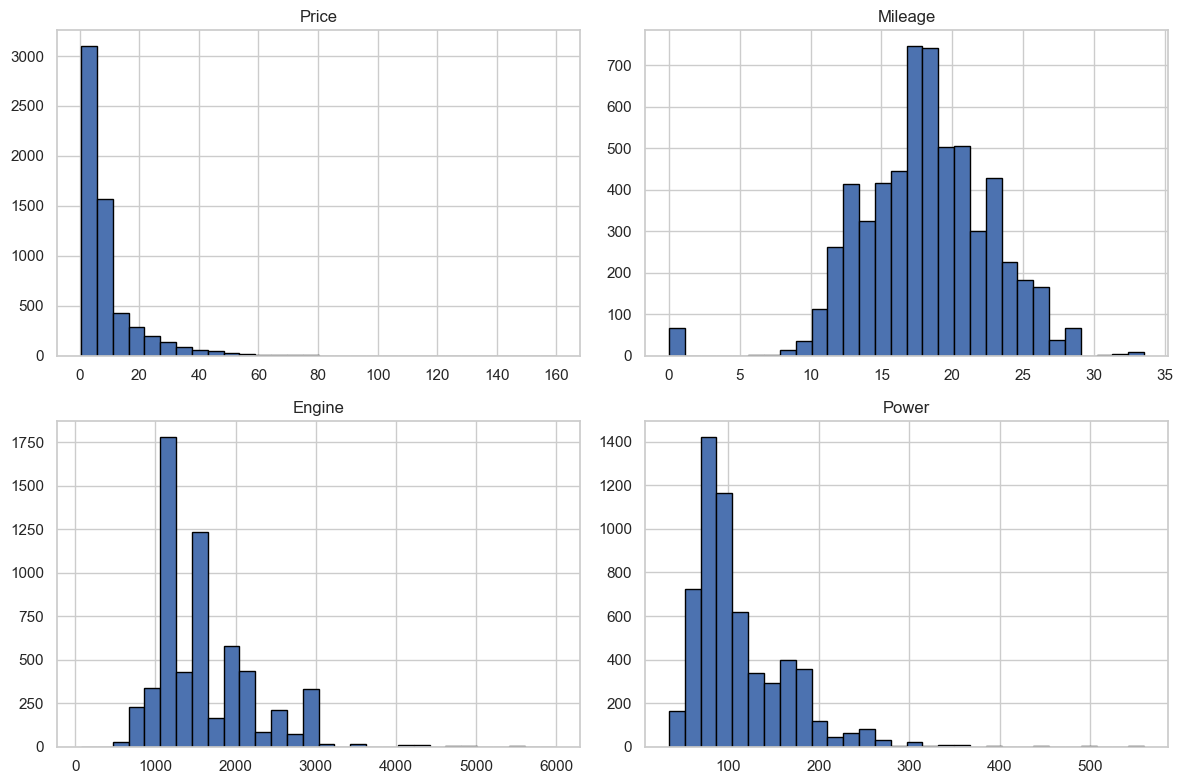

In [7]:

plt.figure(figsize=(12, 8))
df[['Price', 'Mileage', 'Engine', 'Power']].hist(bins=30, figsize=(12, 8), layout=(2, 2), edgecolor='black')
plt.tight_layout()
plt.show()


In [8]:
df.drop(df[df["Mileage"].isna()].index, inplace=True)
# Vérification des valeurs manquantes
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

In [9]:
df_encoded = df.copy()

# Extraire la marque depuis la colonne Name
df_encoded["Brand"] = df_encoded["Name"].apply(lambda x: x.split(" ")[0] if isinstance(x, str) else "Unknown")

df_encoded = df_encoded.drop(["Name","New_Price"], axis=1)

# Encodage basé sur la moyenne des prix
for col in ["Fuel_Type", "Transmission", "Owner_Type", "Location", "Brand"]:
    mean_price = df_encoded.groupby(col)["Price"].mean()
    df_encoded[col] = df_encoded[col].map(mean_price)

# Calculer la matrice de corrélation
correlations = df_encoded.corr()["Price"].sort_values(ascending=False)
correlations

Price                1.000000
Brand                0.770565
Power                0.769982
Engine               0.657848
Transmission         0.586118
Fuel_Type            0.321567
Year                 0.305355
Location             0.249836
Owner_Type           0.097560
Seats                0.052848
Kilometers_Driven   -0.011480
Mileage             -0.306593
Name: Price, dtype: float64

In [10]:
df_cleaned = df.copy()

# Extraire la marque depuis la colonne Name
df_cleaned["Brand"] = df_cleaned["Name"].apply(lambda x: x.split(" ")[0] if isinstance(x, str) else "Unknown")

# Supprimer les colonnes inutiles
df_cleaned = df_cleaned.drop(["Name", "New_Price", "Seats"], axis=1)

# Suppression des outliers AVANT d'appliquer la médiane
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns

for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

# Appliquer la médiane des prix pour encoder les catégories
categorical_cols = ["Fuel_Type", "Transmission", "Owner_Type", "Location", "Brand"]

for col in categorical_cols:
    median_price = df_cleaned.groupby(col)["Price"].median()
    df_cleaned[col] = df_cleaned[col].map(median_price)

# Calculer la matrice de corrélation
correlations = df_cleaned.corr()["Price"].sort_values(ascending=False)
correlations


Price                1.000000
Power                0.652359
Engine               0.583024
Brand                0.575239
Year                 0.406743
Transmission         0.401944
Fuel_Type            0.351027
Location             0.244520
Owner_Type           0.145692
Kilometers_Driven   -0.096134
Mileage             -0.218105
Name: Price, dtype: float64

In [11]:
df_encoded.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,9.425120,2010,72000,3.516786,5.332703,9.961262,26.60,998.0,58.16,5.0,1.75,4.517267
1,6.726254,2015,41000,12.840605,5.332703,9.961262,19.67,1582.0,126.20,5.0,12.50,5.343433
2,7.742982,2011,46000,5.701100,5.332703,9.961262,18.20,1199.0,88.70,5.0,4.50,5.411743
3,7.742982,2012,87000,12.840605,5.332703,9.961262,20.77,1248.0,88.76,7.0,6.00,4.517267
4,15.078223,2013,40670,12.840605,19.852084,7.599886,15.20,1968.0,140.80,5.0,17.74,25.537712


In [12]:
df_encoded.describe()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
count,6017.000000,6017.000000,6.017000e+03,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000
mean,9.478340,2013.358152,5.874228e+04,9.478340,9.478340,9.478340,18.134961,1620.737078,112.902114,5.276882,9.478340,9.478340
std,2.795571,3.269967,9.128375e+04,3.598206,6.558424,1.091663,4.582289,599.398319,53.282014,0.806464,11.189605,8.622321
min,5.661215,1998.000000,1.710000e+02,2.487000,5.332703,3.280000,0.000000,624.000000,34.200000,0.000000,0.440000,1.350000
25%,6.726254,2011.000000,3.400000e+04,5.701100,5.332703,9.961262,15.170000,1198.000000,78.000000,5.000000,3.500000,4.517267
50%,9.425120,2014.000000,5.300000e+04,12.840605,5.332703,9.961262,18.150000,1493.000000,97.700000,5.000000,5.640000,5.343433
75%,11.179186,2016.000000,7.300000e+04,12.840605,19.852084,9.961262,21.100000,1969.000000,138.030000,5.000000,9.950000,8.027638
max,15.078223,2019.000000,6.500000e+06,12.840605,19.852084,9.961262,33.540000,5998.000000,560.000000,10.000000,160.000000,120.000000


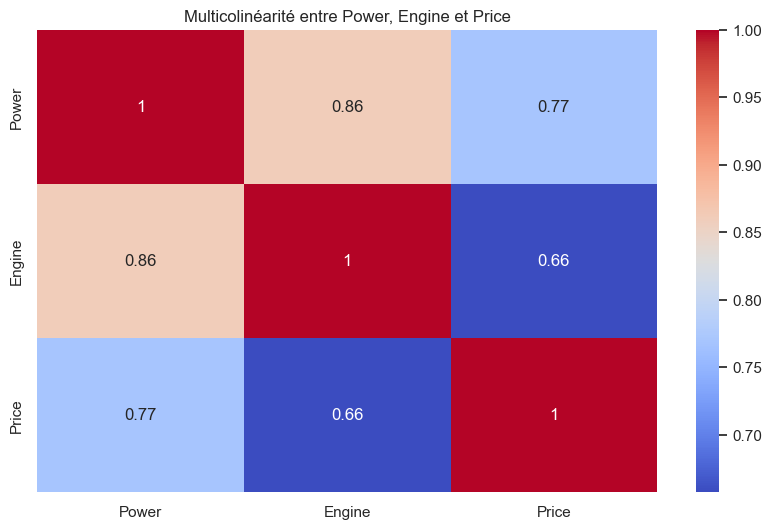

In [13]:
sns.heatmap(df_encoded[["Power", "Engine", "Price"]].corr(), annot=True, cmap="coolwarm")
plt.title("Multicolinéarité entre Power, Engine et Price")
plt.show()


## 🔥 Matrice de Corrélation

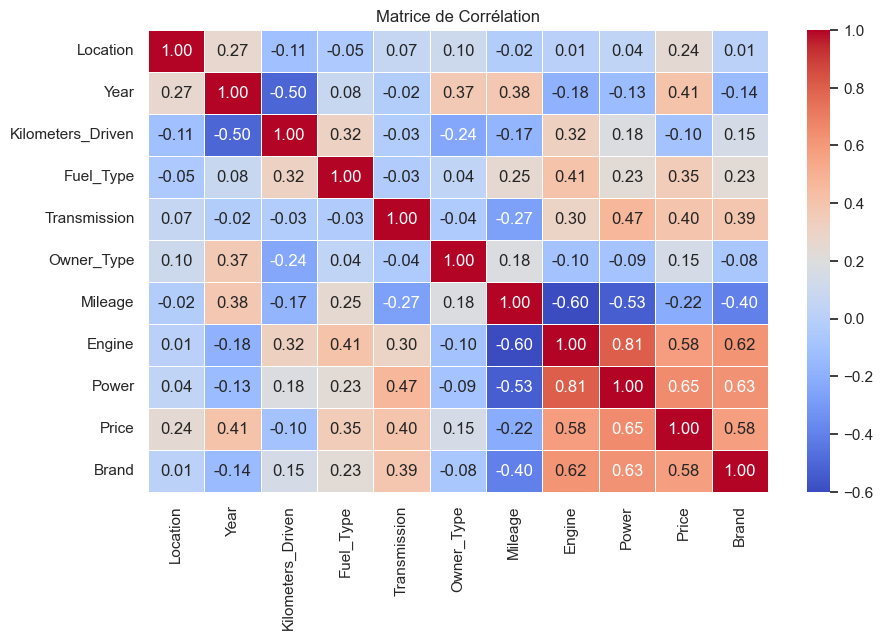

In [14]:

plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()


## 🚨 Détection des valeurs aberrantes (outliers)

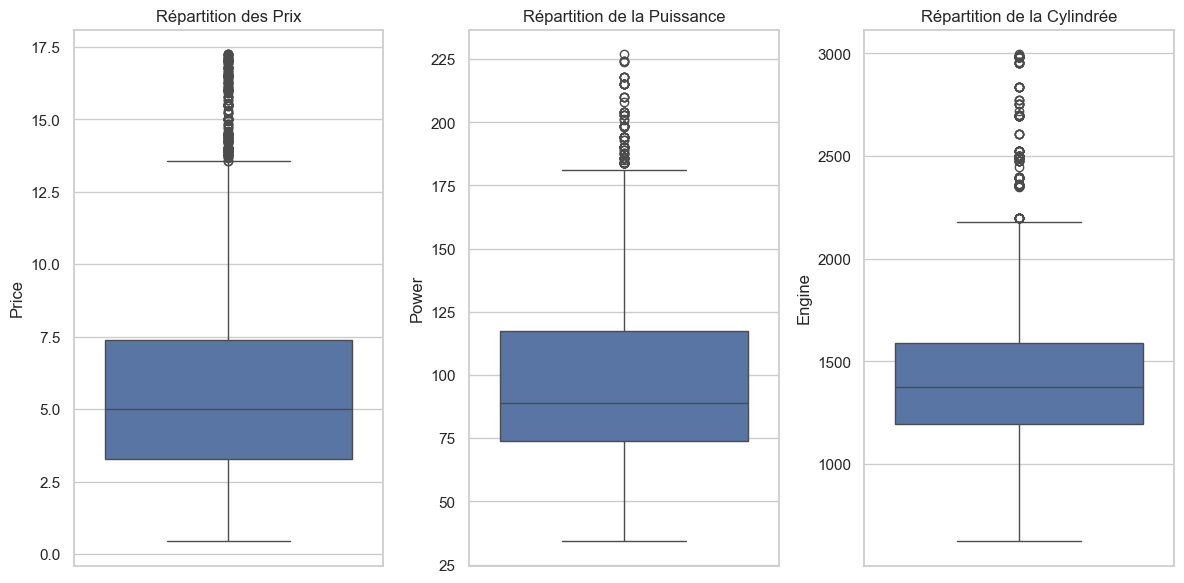

In [15]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=df_cleaned["Price"])
plt.title("Répartition des Prix")

plt.subplot(1, 3, 2)
sns.boxplot(y=df_cleaned["Power"])
plt.title("Répartition de la Puissance")

plt.subplot(1, 3, 3)
sns.boxplot(y=df_cleaned["Engine"])
plt.title("Répartition de la Cylindrée")

plt.tight_layout()
plt.show()


## 🏷️ Analyse des variables catégoriques

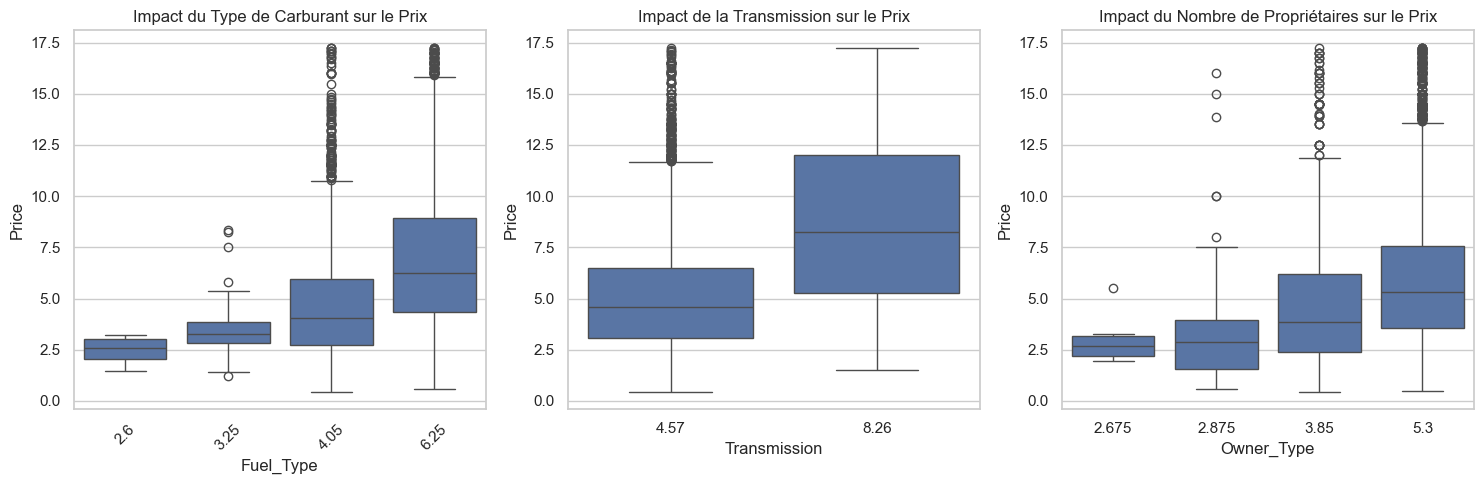

In [16]:

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df_cleaned["Fuel_Type"], y=df_cleaned["Price"])
plt.xticks(rotation=45)
plt.title("Impact du Type de Carburant sur le Prix")

plt.subplot(1, 3, 2)
sns.boxplot(x=df_cleaned["Transmission"], y=df_cleaned["Price"])
plt.title("Impact de la Transmission sur le Prix")

plt.subplot(1, 3, 3)
sns.boxplot(x=df_cleaned["Owner_Type"], y=df_cleaned["Price"])
plt.title("Impact du Nombre de Propriétaires sur le Prix")

plt.tight_layout()
plt.show()


## 📉 Relation entre le kilométrage et le prix

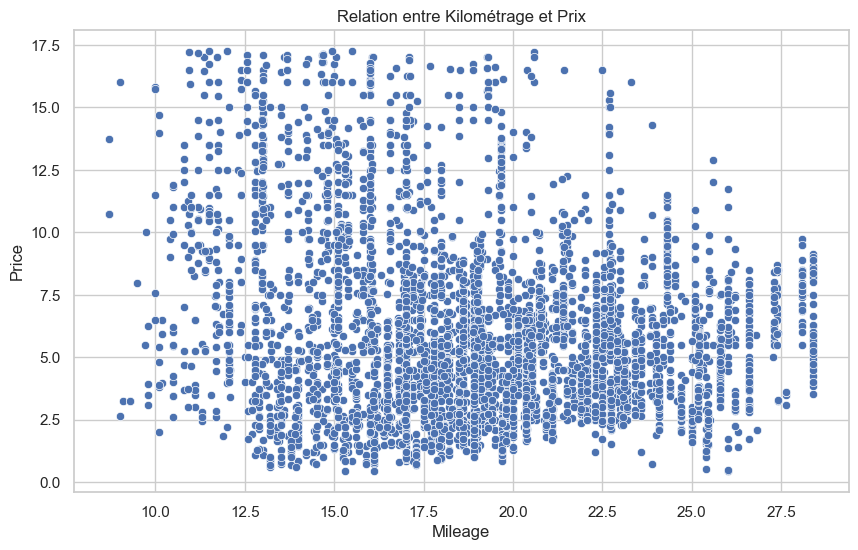

In [17]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned["Mileage"], y=df_cleaned["Price"])
plt.title("Relation entre Kilométrage et Prix")
plt.show()


## 📈 Régression : Influence de la puissance sur le prix

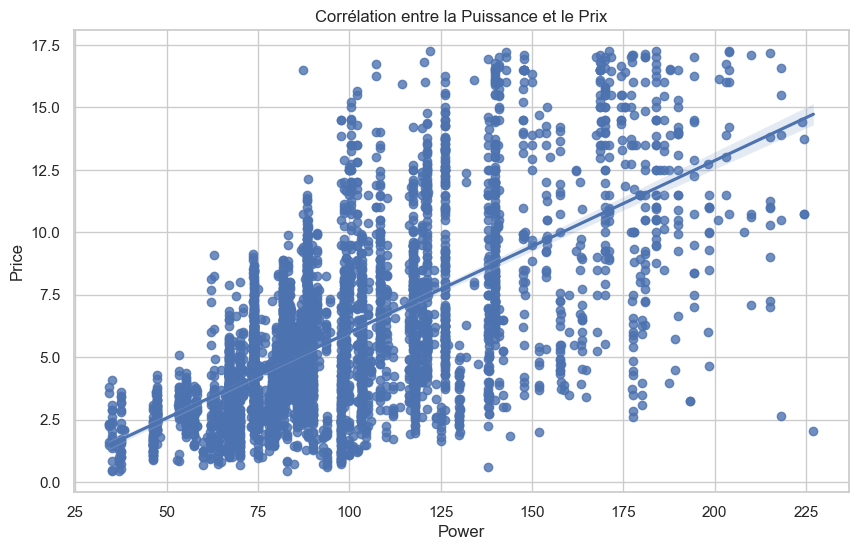

In [18]:

plt.figure(figsize=(10, 6))
sns.regplot(x=df_cleaned["Power"], y=df_cleaned["Price"])
plt.title("Corrélation entre la Puissance et le Prix")
plt.show()


## ❌ Détection des valeurs manquantes

In [19]:

# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values


New_Price    5194
dtype: int64

### 🔥 Visualisation des valeurs manquantes

<Figure size 1000x600 with 0 Axes>

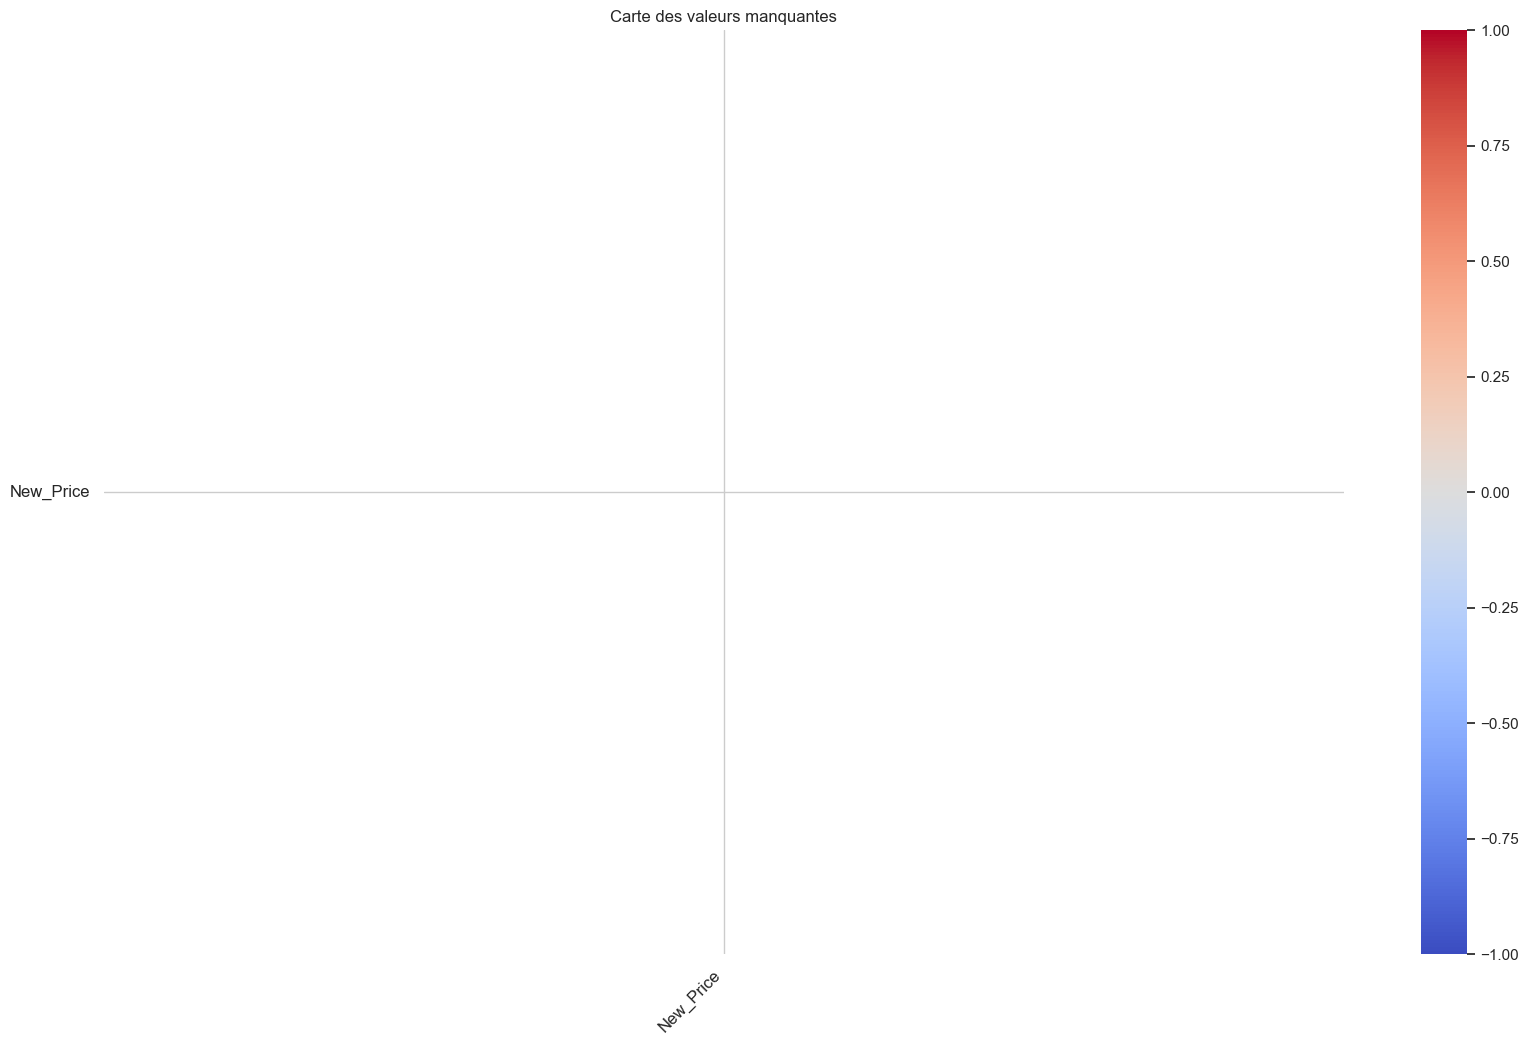

In [20]:

import missingno as msno

plt.figure(figsize=(10, 6))
msno.heatmap(df, cmap="coolwarm", fontsize=12)
plt.title("Carte des valeurs manquantes")
plt.show()
